<a href="https://colab.research.google.com/github/thomaslevasseur/IN104_Levasseur_Crouzet/blob/main/SHAP_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install shap


     |████████████████████████████████| 358kB 6.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=a6404de5ee9bbd4438905249b1efd93206ee8b0550fe78f690888f19117392d3
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.models import load_model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D, Dropout, Dense, Flatten
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #import the dataset

x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0 #resize the arrays
Y_train  = pd.get_dummies(y_train).values
Y_test  = pd.get_dummies(y_test).values

1


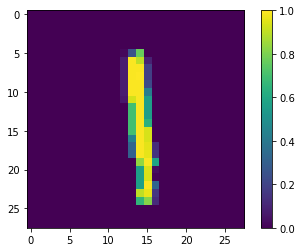

In [ ]:
plt.figure(1)
print(y_train[8])   #check the dataset
plt.imshow(x_train[8, :, :,0])
plt.colorbar()

In [ ]:
datagen = ImageDataGenerator( 
          featurewise_center=False,
          featurewise_std_normalization=False, 
          samplewise_std_normalization=False,  
          zca_whitening=False,                 
          rotation_range=20,                   
          zoom_range = 0.1,                    
          width_shift_range=0.1,               
          height_shift_range=0.1,              
          horizontal_flip=False,              
          vertical_flip=False)        


In [ ]:
model=Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())     # Applatissement de la sortie du réseau de convolution
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.25))
# Couche de sortie : nombre de neurones = nombre de classe à prédire
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [ ]:
model.fit(datagen.flow(x_train, Y_train, batch_size=32),steps_per_epoch=500,epochs=2,verbose=1,validation_data=(x_test, Y_test))


Epoch 1/2
500/500 [==============================] - 152s 301ms/step - loss: 1.1813 - accuracy: 0.6806 - val_loss: 0.1456 - val_accuracy: 0.9532
Epoch 2/2
500/500 [==============================] - 150s 300ms/step - loss: 0.2294 - accuracy: 0.9327 - val_loss: 0.1157 - val_accuracy: 0.9640


In [ ]:
predict=model.predict(x_test,verbose=1)
predict=np.argmax(predict, axis=1)


313/313 [==============================] - 18s 57ms/step


In [ ]:
import shap

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


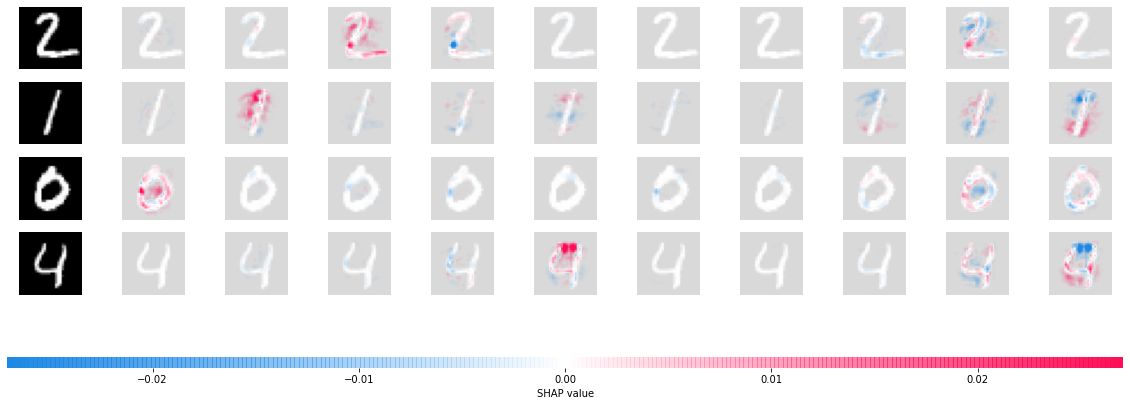

In [ ]:

data = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

explainer = shap.GradientExplainer(model, data)
shap_values = explainer.shap_values(x_test[1:5])

shap.image_plot(shap_values, x_test[1:5])